<img align="center" src="https://iili.io/3wI8gI.png" style="height:90px" style="width:30px"/>

# Building a RandomForest to predict House Prices in Stockholm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hemnet_gmaps.csv")

In [2]:
df

address     price  list_fee   sold_date    sqm  rooms  \
0           Settergatan 14   7500000    4312.0  2023-04-12   71.0    3.0   
1          Heimdalsgatan 5  14200000    4755.0  2023-04-12  103.0    5.0   
2         Bellmansgatan 21  10400000    3760.0  2023-04-12   83.0    3.0   
3         Gumshornsgatan 7   3900000    1975.0  2023-04-12   28.5    1.0   
4            Bondegatan 46   2750000    1206.0  2023-04-12   21.0    1.0   
...                    ...       ...       ...         ...    ...    ...   
2405     Kellgrensgatan 10   6450000    4981.0  2022-10-01   88.0    4.0   
2406     Roslagsgatan 23 B   6042000    2299.0  2022-10-01   60.0    2.0   
2407  Sankt Eriksgatan 52A   7050000    3197.0  2022-10-01   73.0    2.5   
2408     Gästrikegatan 14A   7700000    2926.0  2022-10-01   61.0    3.0   
2409         Bondegatan 50   3800000    1777.0  2022-10-01   43.0    2.0   

      elevator  patio  new_production  balcony  gardet  kungsholmen  norrmalm  \
0            1      0               0        1       1            0         0   
1            1      0               0        1       0            0         0   
2            0      0               0        1       0            0         0   
3            1      0               0        1       0            0         0   
4            1      0               0        1       0            0         0   
...        ...    ...             ...      ...     ...          ...       ...   
2405         1      0               0        1       0            1         0   
2406         0      0               0        1       0            0         0   
2407         1      0               0        1       0            1         0   
2408         0      0               0        0       0            0         0   
2409         1      0               0        0       0            0         0   

      ostermalm  sodermalm  vasastan   latitude  longitude  \
0             0          0         0  59.359598  18.095192   
1             0          0         1  59.344440  18.047711   
2             0          1         0  59.317409  18.066333   
3             1          0         0  59.336256  18.089190   
4             0          1         0  59.313272  18.083210   
...         ...        ...       ...        ...        ...   
2405          0          0         0  59.336435  18.014871   
2406          0          0         1  59.347264  18.058401   
2407          0          0         0  59.335717  18.034554   
2408          0          0         1  59.341689  18.040275   
2409          0          1         0  59.313388  18.084021   

     distance_to_central_station  
0                         4.3 km  
1                         1.6 km  
2                         2.0 km  
3                         2.2 km  
4                         3.0 km  
...                          ...  
2405                      2.9 km  
2406                      2.3 km  
2407                      1.8 km  
2408                      1.7 km  
2409                      3.0 km  

[2410 rows x 19 columns]

In [3]:
df.describe()

price      list_fee          sqm        rooms     elevator  \
count  2.410000e+03   2410.000000  2410.000000  2410.000000  2410.000000   
mean   6.183247e+06   2831.847303    59.908008     2.315560     0.815768   
std    3.991563e+06   1338.965524    30.386906     1.016319     0.387754   
min    1.900000e+06      0.000000    16.000000     1.000000     0.000000   
25%    3.700000e+06   1927.250000    38.000000     2.000000     1.000000   
50%    5.115000e+06   2554.500000    53.000000     2.000000     1.000000   
75%    7.368750e+06   3507.750000    75.000000     3.000000     1.000000   
max    6.700000e+07  10997.000000   275.000000     8.000000     1.000000   

             patio  new_production      balcony       gardet  kungsholmen  \
count  2410.000000     2410.000000  2410.000000  2410.000000  2410.000000   
mean      0.042324        0.009544     0.538589     0.025311     0.246058   
std       0.201368        0.097244     0.498612     0.157101     0.430802   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.000000        0.000000     0.000000     0.000000     0.000000   
50%       0.000000        0.000000     1.000000     0.000000     0.000000   
75%       0.000000        0.000000     1.000000     0.000000     0.000000   
max       1.000000        1.000000     1.000000     1.000000     1.000000   

          norrmalm    ostermalm    sodermalm     vasastan     latitude  \
count  2410.000000  2410.000000  2410.000000  2410.000000  2410.000000   
mean      0.011618     0.119087     0.313278     0.282988    59.331110   
std       0.107182     0.323958     0.463923     0.450544     0.012988   
min       0.000000     0.000000     0.000000     0.000000    59.305633   
25%       0.000000     0.000000     0.000000     0.000000    59.317884   
50%       0.000000     0.000000     0.000000     0.000000    59.333979   
75%       0.000000     0.000000     1.000000     1.000000    59.341769   
max       1.000000     1.000000     1.000000     1.000000    59.371003   

         longitude  
count  2410.000000  
mean     18.051853  
std       0.025022  
min      17.984452  
25%      18.033695  
50%      18.049411  
75%      18.072959  
max      18.113146

<Axes: ylabel='price'>

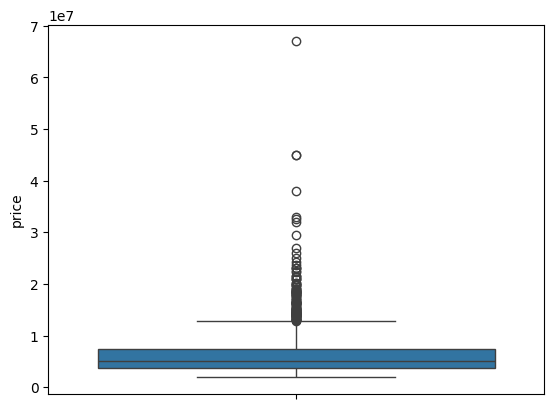

In [4]:
sns.boxplot(data=df, y="price")

In [5]:
df.price.min()

1900000

In [6]:
df.price.max()

67000000

In [7]:
df.rooms.quantile(.98)

5.0

In [8]:
df.price.quantile(.951)

12750000.0

In [9]:
# winzoring the outliers d
df.loc[df.price > df.price.quantile(.951), "price"] = df.price.quantile(.951)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      2410 non-null   object 
 1   price                        2410 non-null   int64  
 2   list_fee                     2410 non-null   float64
 3   sold_date                    2410 non-null   object 
 4   sqm                          2410 non-null   float64
 5   rooms                        2410 non-null   float64
 6   elevator                     2410 non-null   int64  
 7   patio                        2410 non-null   int64  
 8   new_production               2410 non-null   int64  
 9   balcony                      2410 non-null   int64  
 10  gardet                       2410 non-null   int64  
 11  kungsholmen                  2410 non-null   int64  
 12  norrmalm                     2410 non-null   int64  
 13  ostermalm         

# EDA

In [11]:
df.columns

Index(['address', 'price', 'list_fee', 'sold_date', 'sqm', 'rooms', 'elevator',
       'patio', 'new_production', 'balcony', 'gardet', 'kungsholmen',
       'norrmalm', 'ostermalm', 'sodermalm', 'vasastan', 'latitude',
       'longitude', 'distance_to_central_station'],
      dtype='object')

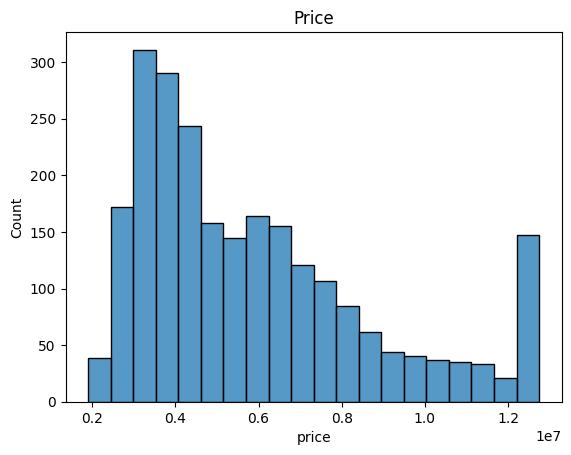

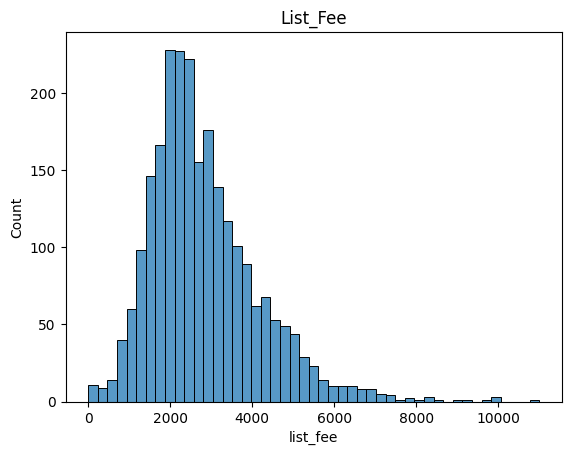

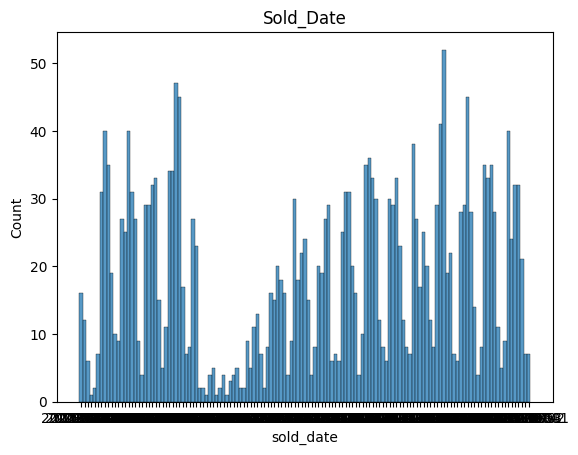

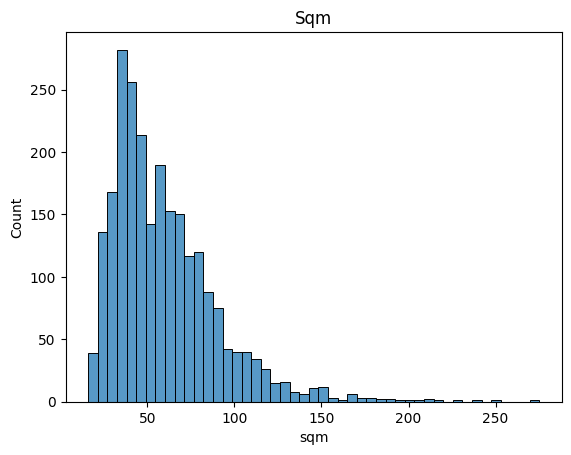

In [12]:
for col in ['price', 'list_fee', 'sold_date', 'sqm']:
    sns.histplot(data=df, x=col)
    plt.title(col.title())
    plt.show()

In [13]:
#Här

df["price_sqm"] = df.price/df.sqm

In [32]:
df["distance_to_central_station"] = df["distance_to_central_station"].str.replace(" km", "").astype(float)

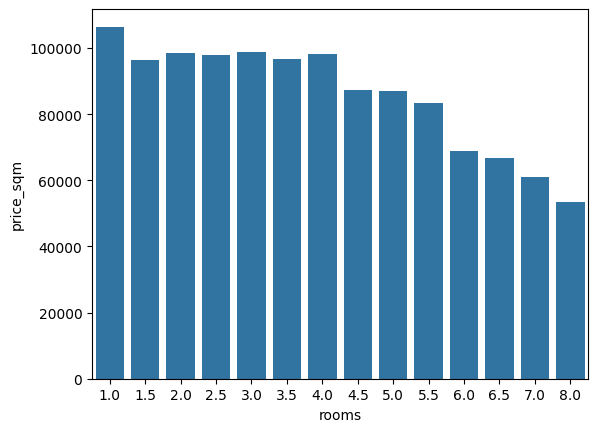

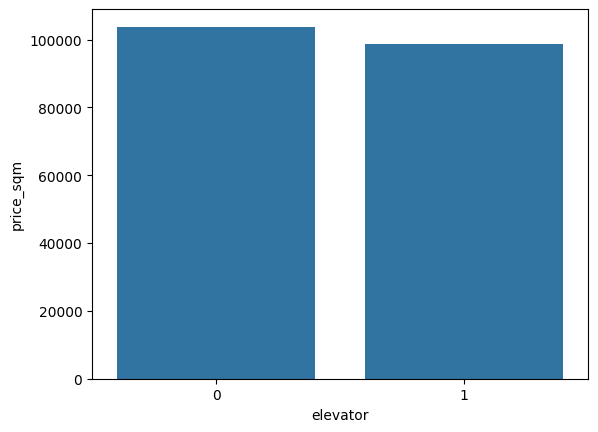

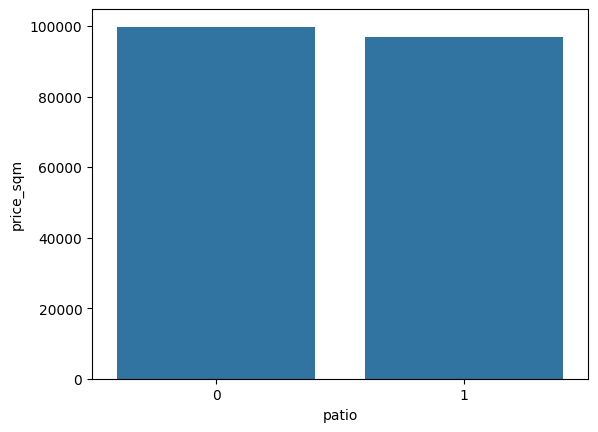

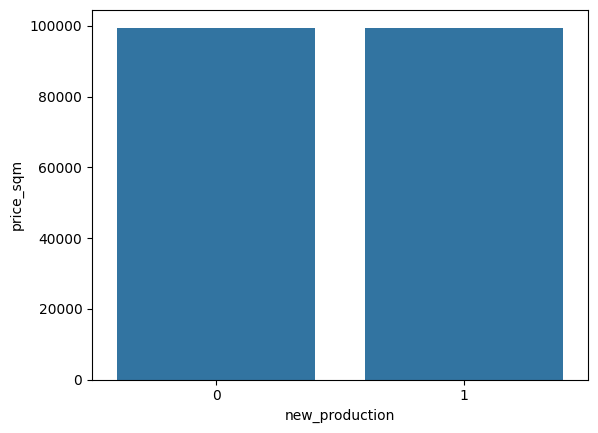

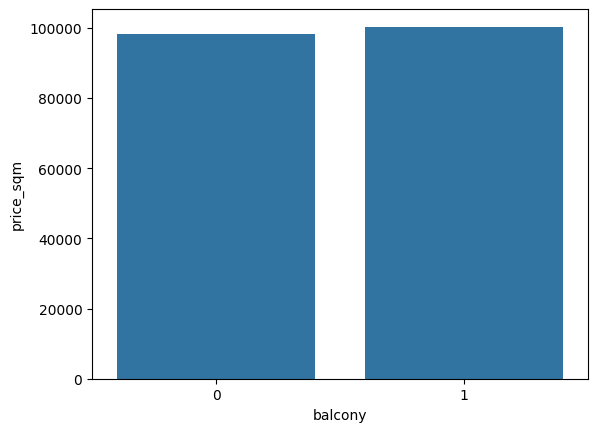

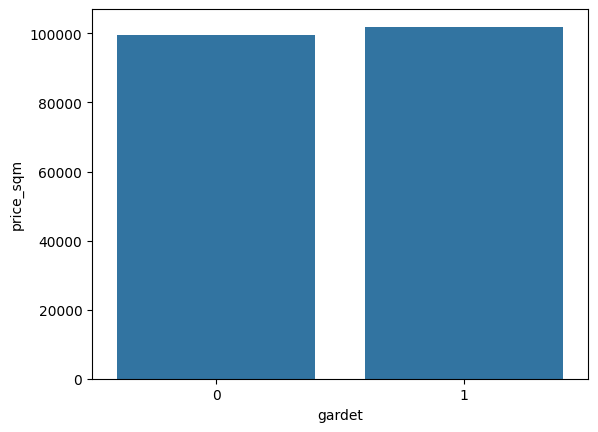

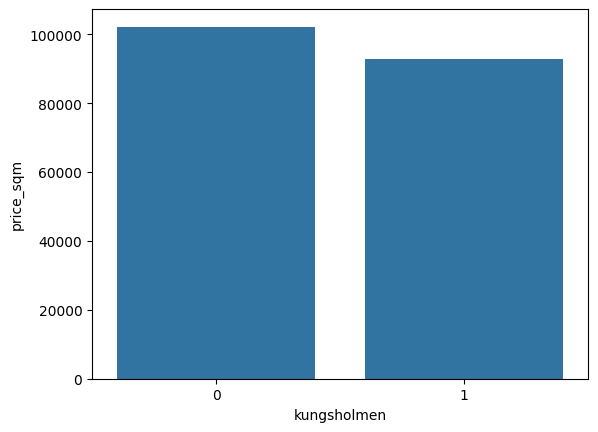

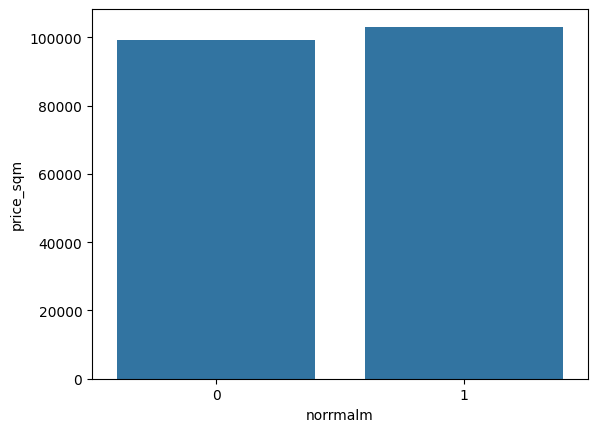

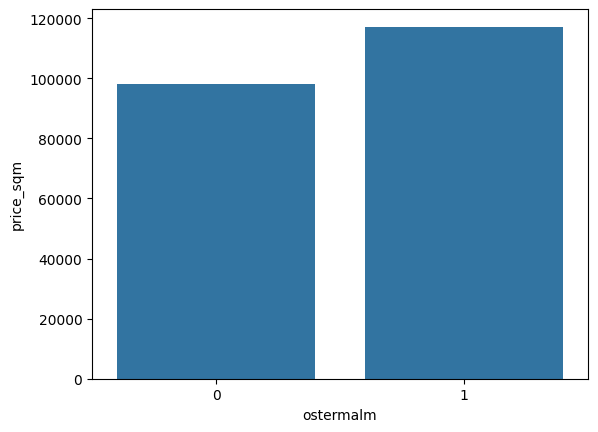

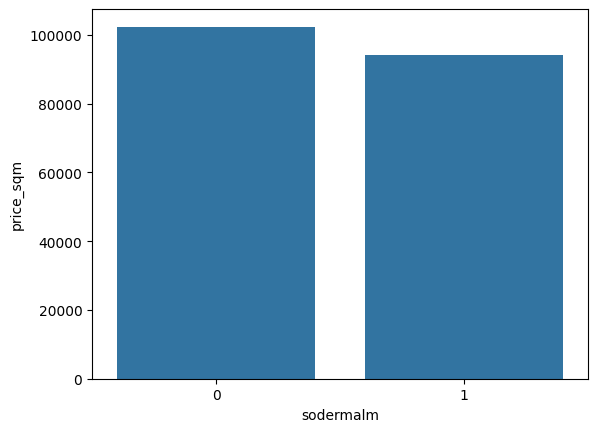

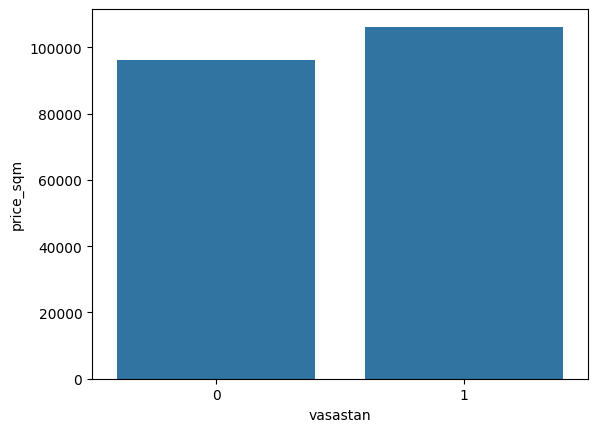

In [14]:
for col in ['rooms', 'elevator','patio', 'new_production', 'balcony', 'gardet', 'kungsholmen','norrmalm', 'ostermalm', 'sodermalm', 'vasastan']:
    sns.barplot(x=col, y="price_sqm", data=df, estimator="median", errorbar=None)
    plt.ticklabel_format(style="plain", axis="y")
    plt.show()
    
    
    
    

<Axes: >

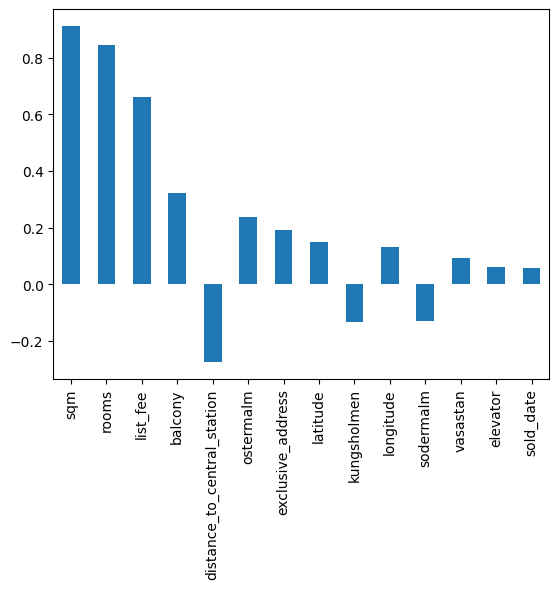

In [33]:
df.corr(numeric_only=True)["price"].drop(index="price").sort_values(ascending=False, key=abs).plot.bar()

In [34]:
df.corr(numeric_only=True)["price"].drop(index="price").sort_values(ascending=False, key=abs).to_frame()

price
sqm                          0.911738
rooms                        0.845097
list_fee                     0.660494
balcony                      0.321136
distance_to_central_station -0.274082
ostermalm                    0.236419
exclusive_address            0.193372
latitude                     0.149641
kungsholmen                 -0.132466
longitude                    0.132404
sodermalm                   -0.128575
vasastan                     0.092482
elevator                     0.059908
sold_date                    0.058016

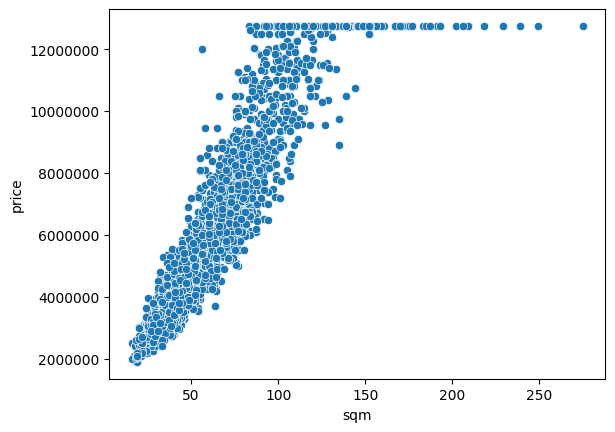

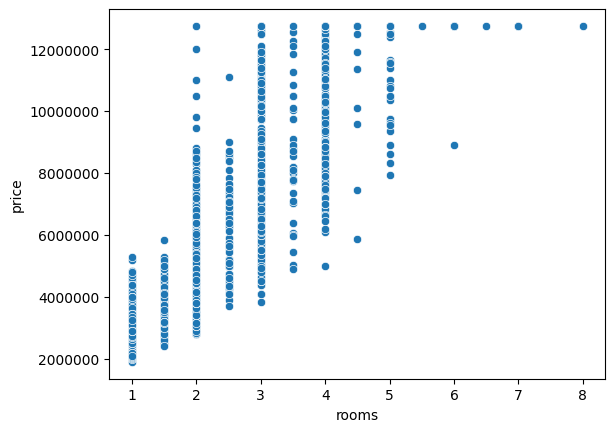

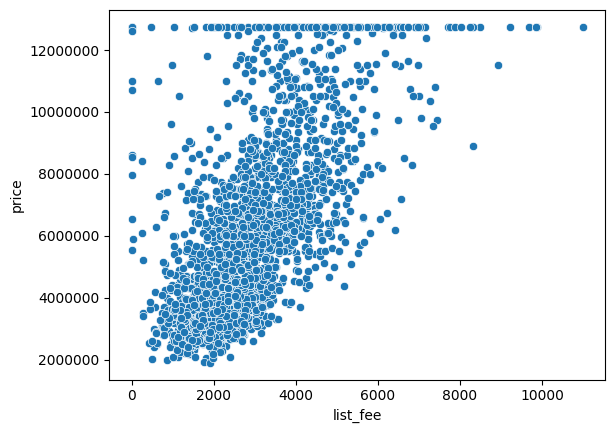

In [17]:
for col in ["sqm", "rooms", "list_fee"]:
    sns.scatterplot(x=col, y="price", data=df)
    plt.ticklabel_format(style="plain", axis="y")
    plt.show()

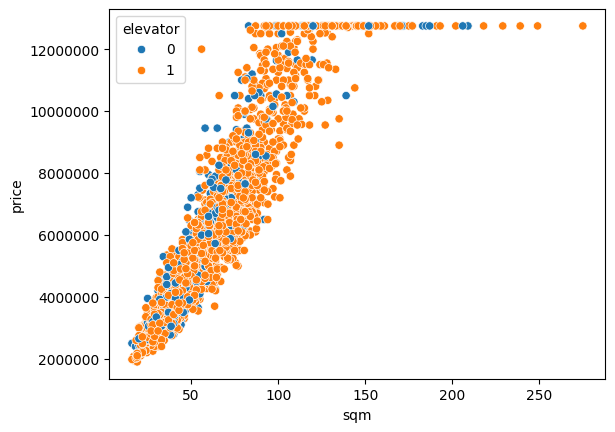

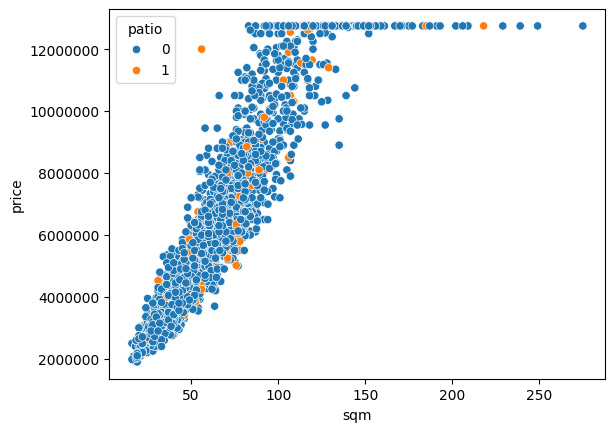

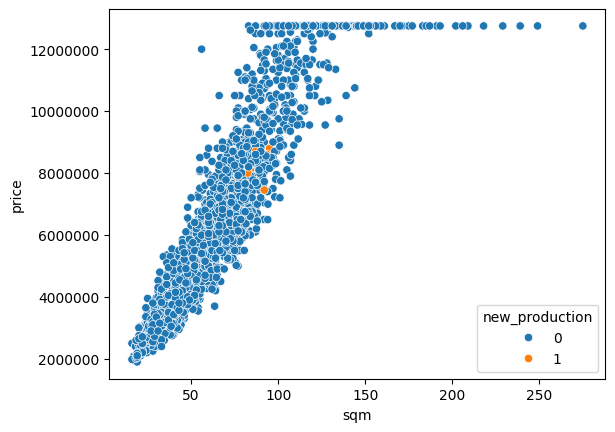

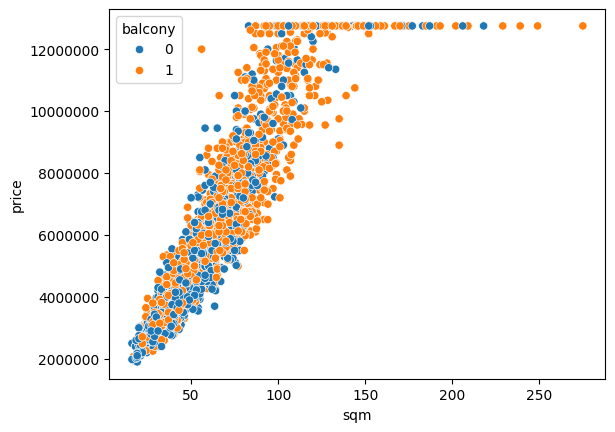

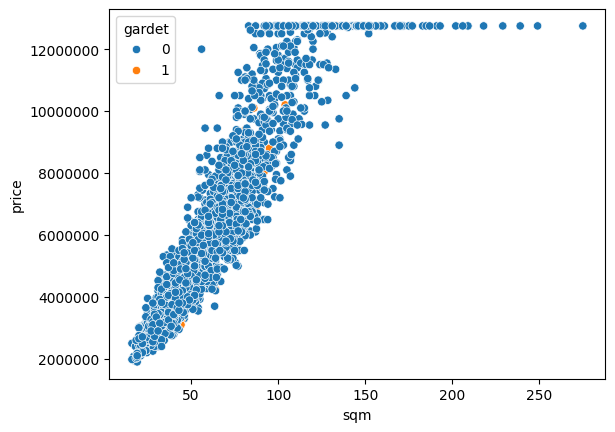

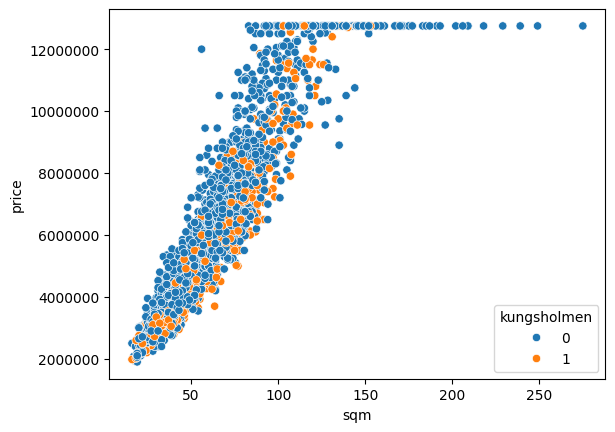

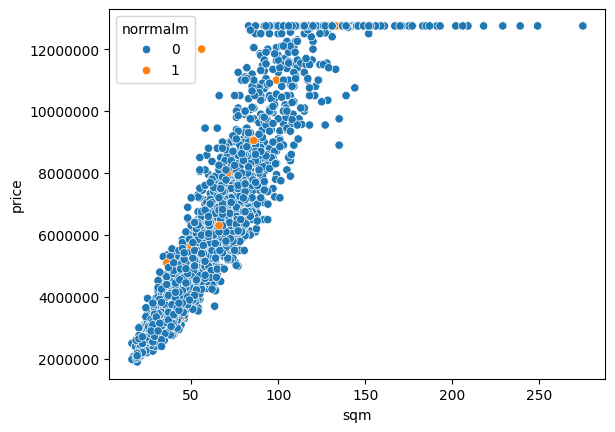

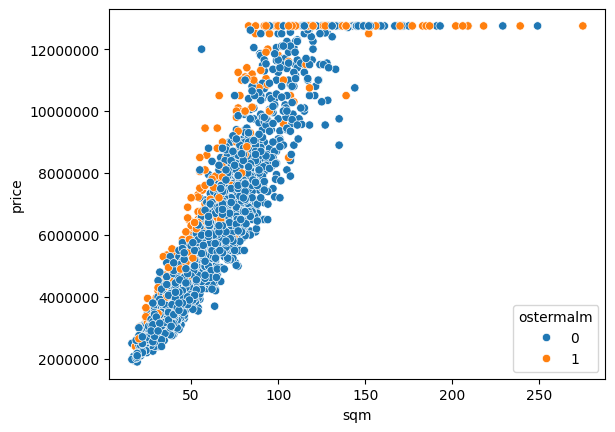

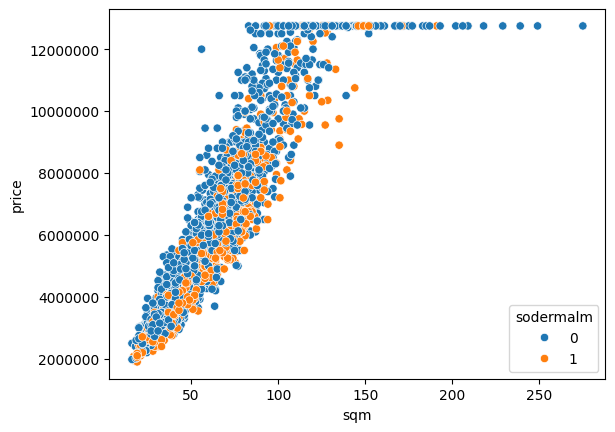

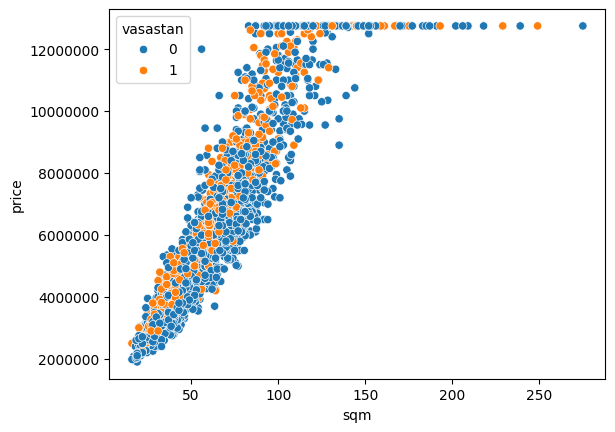

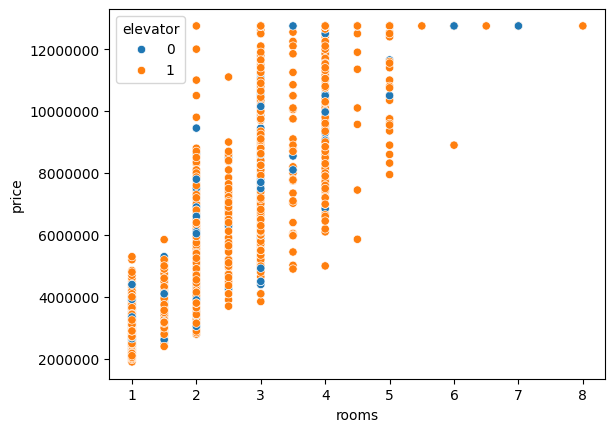

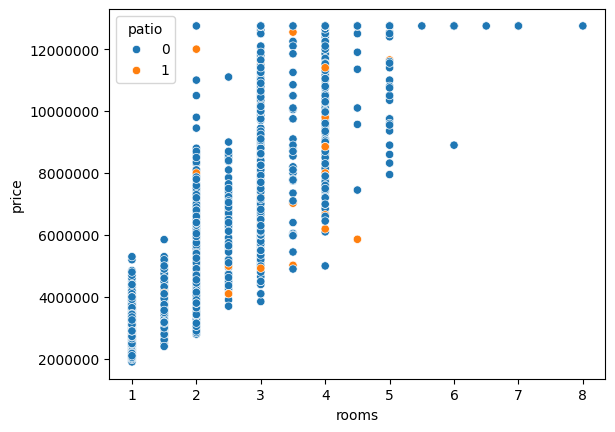

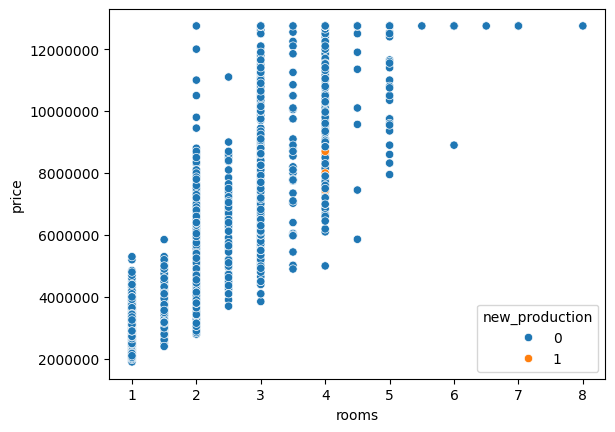

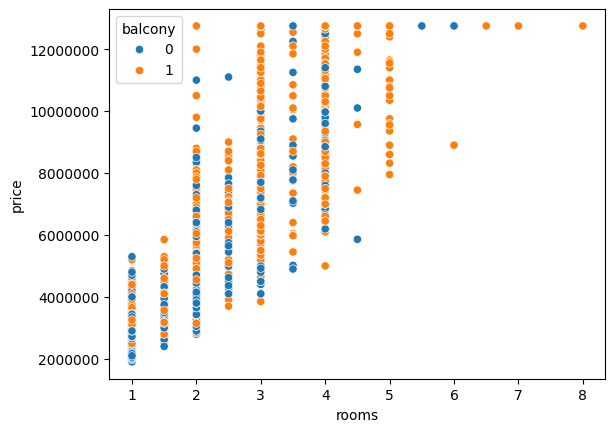

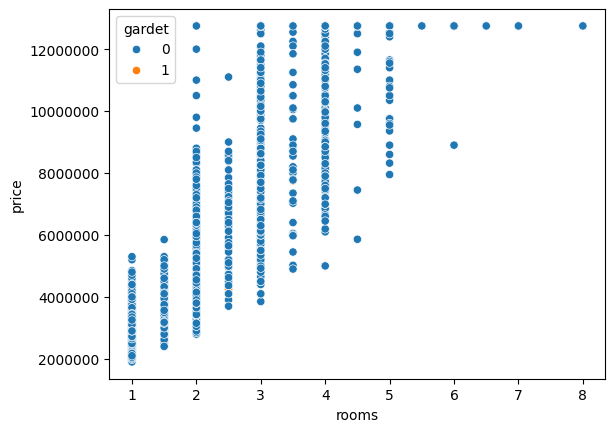

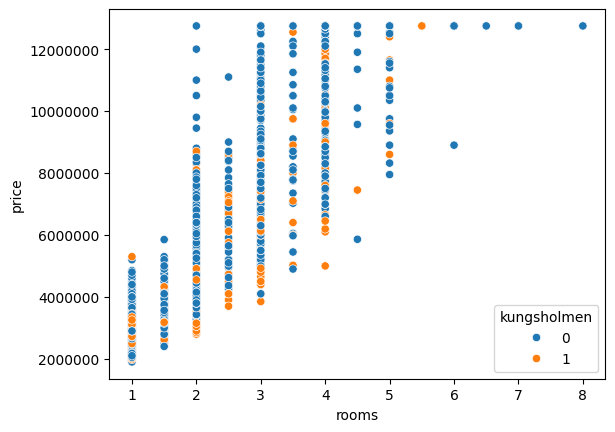

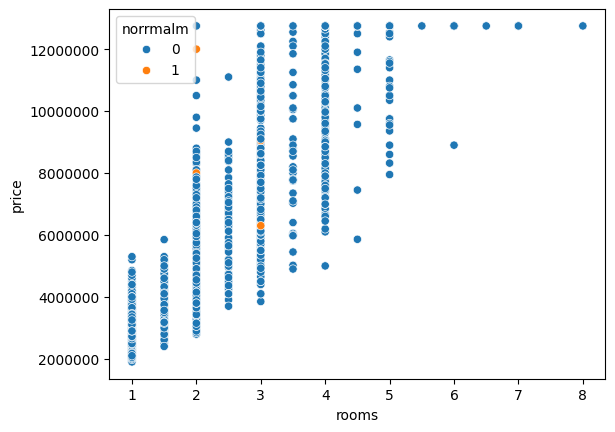

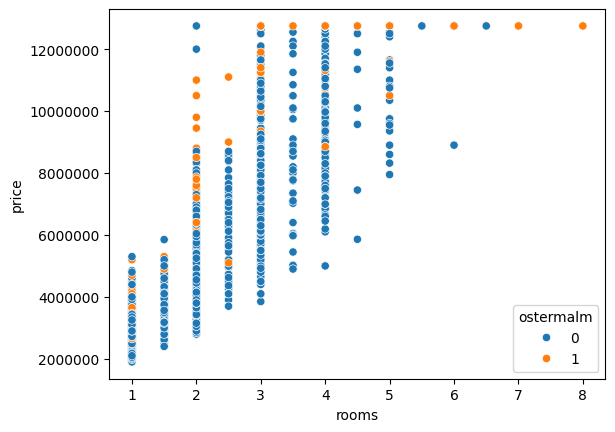

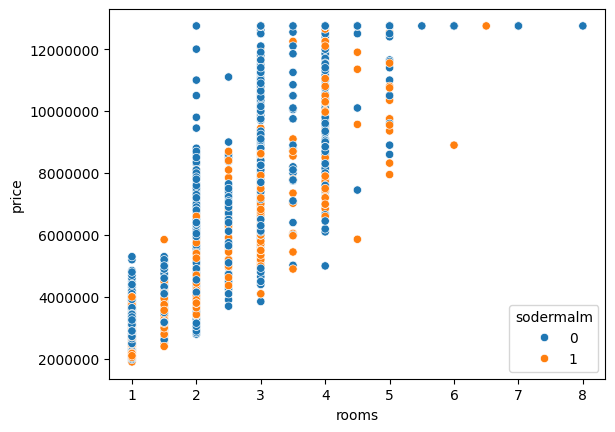

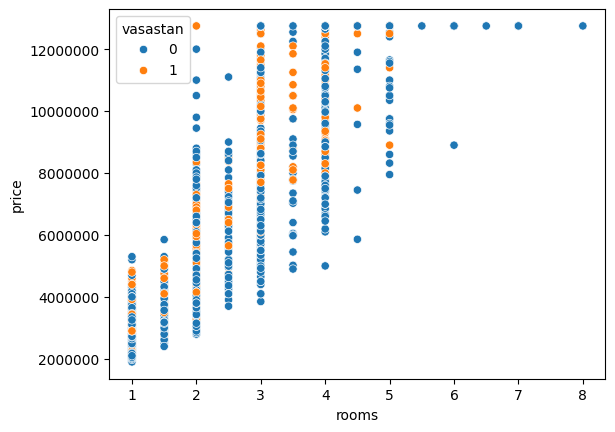

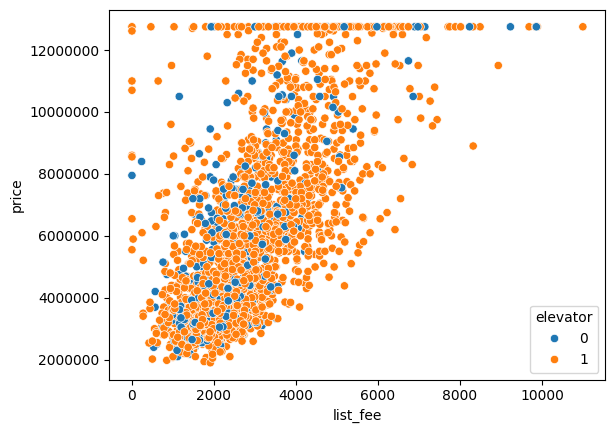

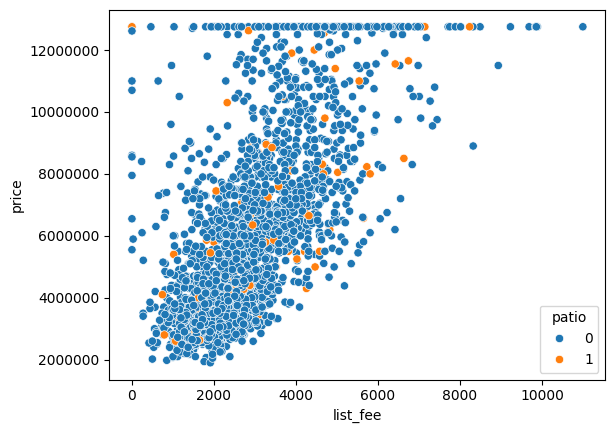

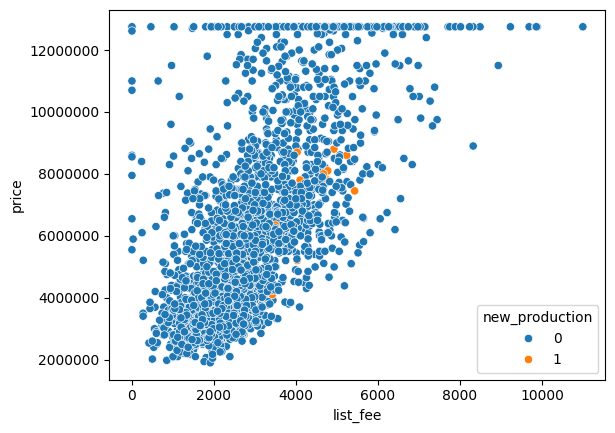

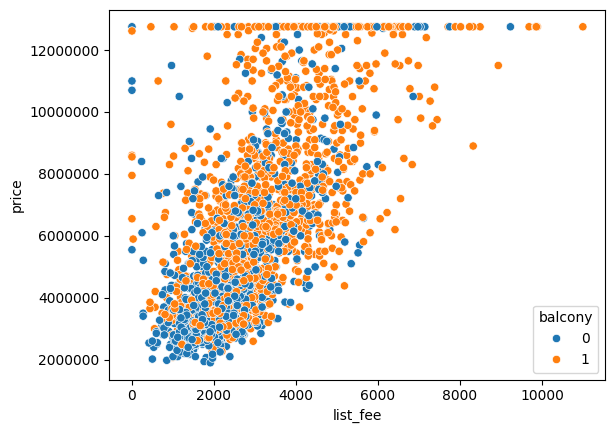

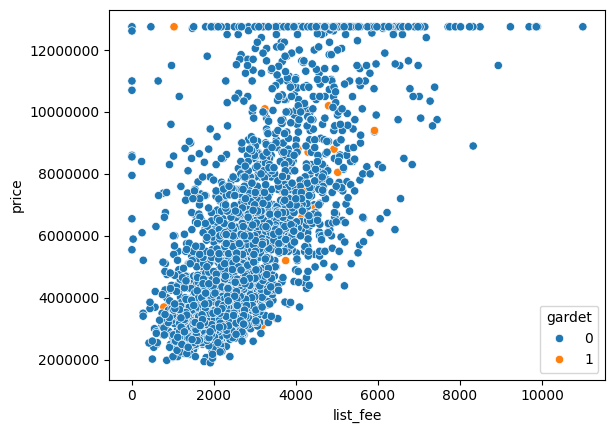

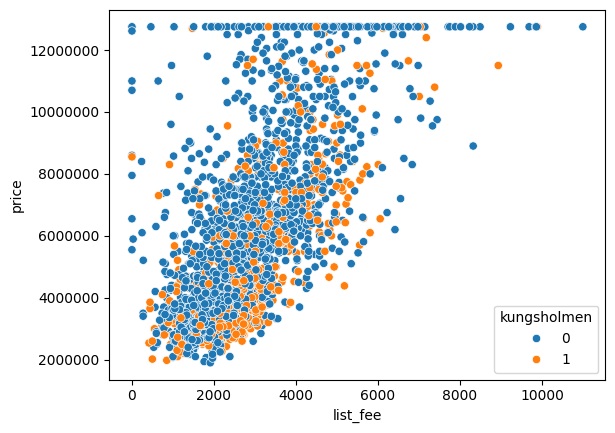

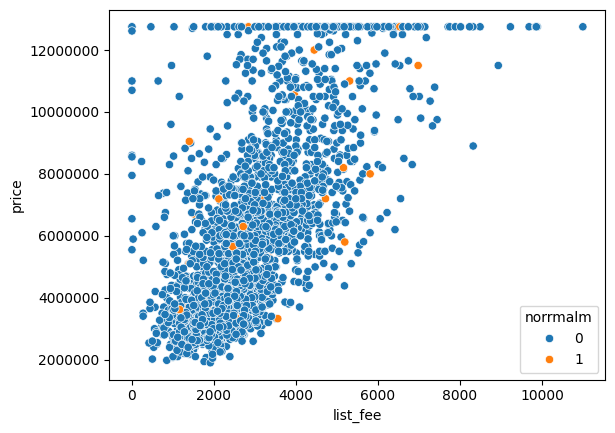

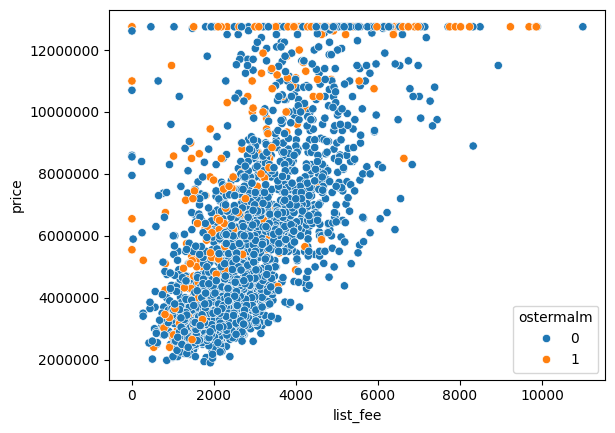

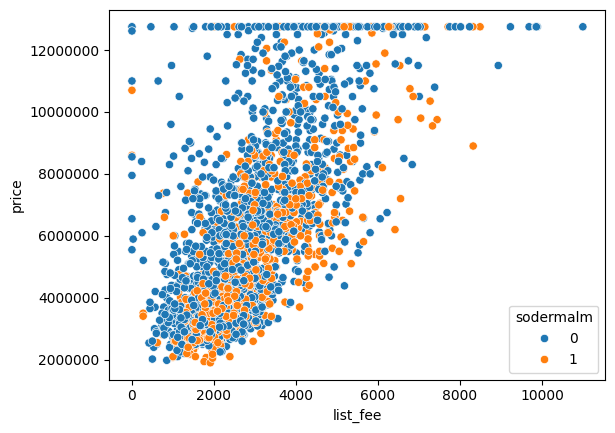

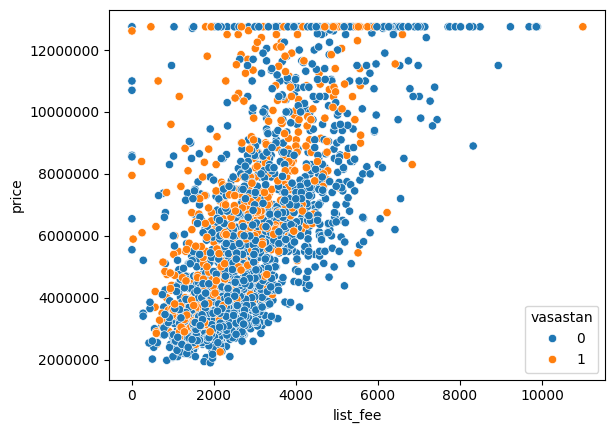

In [18]:
for col in ["sqm", "rooms", "list_fee"]:
    for binary_col in ['elevator','patio', 'new_production', 'balcony', 'gardet', 'kungsholmen','norrmalm', 'ostermalm', 'sodermalm', 'vasastan']:
        sns.scatterplot(x=col, y="price", data=df, hue=binary_col)
        plt.ticklabel_format(style="plain", axis="y")
        plt.show()

# Feature Selection & Engineering

In [19]:
df.head()

address     price  list_fee   sold_date    sqm  rooms  elevator  \
0    Settergatan 14   7500000    4312.0  2023-04-12   71.0    3.0         1   
1   Heimdalsgatan 5  12750000    4755.0  2023-04-12  103.0    5.0         1   
2  Bellmansgatan 21  10400000    3760.0  2023-04-12   83.0    3.0         0   
3  Gumshornsgatan 7   3900000    1975.0  2023-04-12   28.5    1.0         1   
4     Bondegatan 46   2750000    1206.0  2023-04-12   21.0    1.0         1   

   patio  new_production  balcony  gardet  kungsholmen  norrmalm  ostermalm  \
0      0               0        1       1            0         0          0   
1      0               0        1       0            0         0          0   
2      0               0        1       0            0         0          0   
3      0               0        1       0            0         0          1   
4      0               0        1       0            0         0          0   

   sodermalm  vasastan   latitude  longitude distance_to_central_station  \
0          0         0  59.359598  18.095192                      4.3 km   
1          0         1  59.344440  18.047711                      1.6 km   
2          1         0  59.317409  18.066333                      2.0 km   
3          0         0  59.336256  18.089190                      2.2 km   
4          1         0  59.313272  18.083210                      3.0 km   

       price_sqm  
0  105633.802817  
1  123786.407767  
2  125301.204819  
3  136842.105263  
4  130952.380952

In [20]:
from datetime import datetime

df["sold_date"] = df["sold_date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal())

In [21]:
df["sold_date"].min()

738429

In [22]:
df["sold_date"].max()

738622

In [23]:
df['sold_date'] = df['sold_date'] - (df["sold_date"].min())

In [24]:
df.drop(columns=["gardet", "norrmalm", "patio", "new_production"], inplace=True)

In [25]:
expensive_streets = [
    "Strandvägen",
    "Villagatan",
    "Nybrogatan",
    "Fredrikshovsgatan",
    "Narvavägen",
    "Brahegatan",
    "Grev Turegatan",
    "Floragatan",
    "Styrmansgatan",
    "Engelbrektsgatan",
    "Erik Dahlbergsgatan",
    "Torstenssonsgatan",
    "Grev Magnigatan",
    "Storgatan",
    "Karlavägen",
    "Lilla Nygatan",
    "Mosebacke torg",
    "Iversonsgatan",
    "Östermalmsgatan",
    "Humlegårdsgatan",
    "Kommendörsgatan",
    "Artillerigatan"
    
]

def check_street(x):
    return 1 if any(street in x for street in expensive_streets) else 0

df["exclusive_address"] = df['address'].apply(check_street)

In [26]:
df.drop("address", axis=1, inplace=True)
df.drop("price_sqm", axis=1, inplace=True)

In [43]:
df

price  list_fee  sold_date    sqm  rooms  elevator  balcony  \
0      7500000    4312.0        193   71.0    3.0         1        1   
1     12750000    4755.0        193  103.0    5.0         1        1   
2     10400000    3760.0        193   83.0    3.0         0        1   
3      3900000    1975.0        193   28.5    1.0         1        1   
4      2750000    1206.0        193   21.0    1.0         1        1   
...        ...       ...        ...    ...    ...       ...      ...   
2405   6450000    4981.0          0   88.0    4.0         1        1   
2406   6042000    2299.0          0   60.0    2.0         0        1   
2407   7050000    3197.0          0   73.0    2.5         1        1   
2408   7700000    2926.0          0   61.0    3.0         0        0   
2409   3800000    1777.0          0   43.0    2.0         1        0   

      kungsholmen  ostermalm  sodermalm  vasastan   latitude  longitude  \
0               0          0          0         0  59.359598  18.095192   
1               0          0          0         1  59.344440  18.047711   
2               0          0          1         0  59.317409  18.066333   
3               0          1          0         0  59.336256  18.089190   
4               0          0          1         0  59.313272  18.083210   
...           ...        ...        ...       ...        ...        ...   
2405            1          0          0         0  59.336435  18.014871   
2406            0          0          0         1  59.347264  18.058401   
2407            1          0          0         0  59.335717  18.034554   
2408            0          0          0         1  59.341689  18.040275   
2409            0          0          1         0  59.313388  18.084021   

      distance_to_central_station  exclusive_address  
0                             4.3                  0  
1                             1.6                  0  
2                             2.0                  0  
3                             2.2                  0  
4                             3.0                  0  
...                           ...                ...  
2405                          2.9                  0  
2406                          2.3                  0  
2407                          1.8                  0  
2408                          1.7                  0  
2409                          3.0                  0  

[2410 rows x 15 columns]

# Machine Learning

In [35]:
# X, y
X = df.drop("price", axis=1)
y = df["price"]

## train test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline



rf = RandomForestRegressor()
pipe = make_pipeline(rf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])

In [38]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")

print(f"Cross fold = {cv_score}\nCross fold avg = {cv_score.mean()}")

Cross fold = [-543675.86787565 -496647.19127807 -521405.50518135 -491112.94805195
 -492340.85714286]
Cross fold avg = -509036.47390597314


In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

y_pred = pipe.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mae_pct = mean_absolute_percentage_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("TRAINING DATA\n")
print("MSE: ", mse)
print("MAE: ", mae)
print("MAE pct: ", mae_pct)
print("R-squared: ", r2)

TRAINING DATA

MSE:  79077728627.53436
MAE:  188627.42522475796
MAE pct:  0.031292755894883936
R-squared:  0.9902031972935363


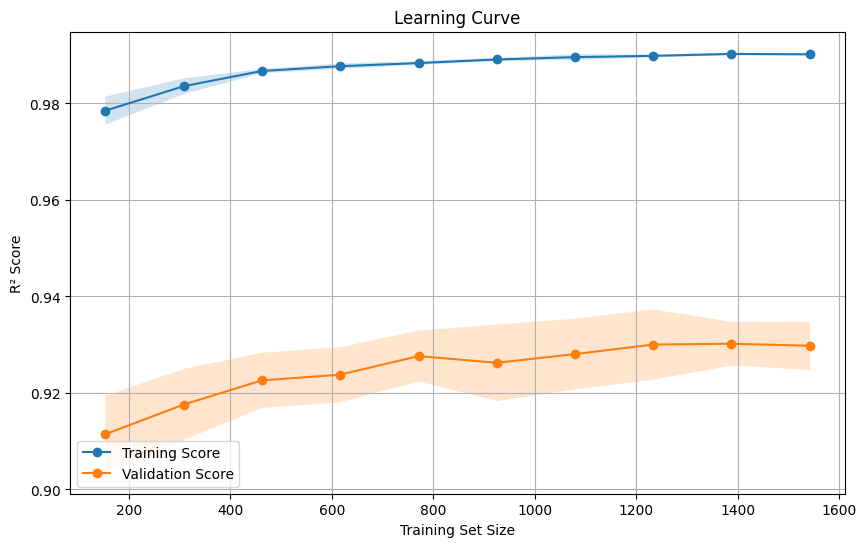

In [40]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Score", marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()



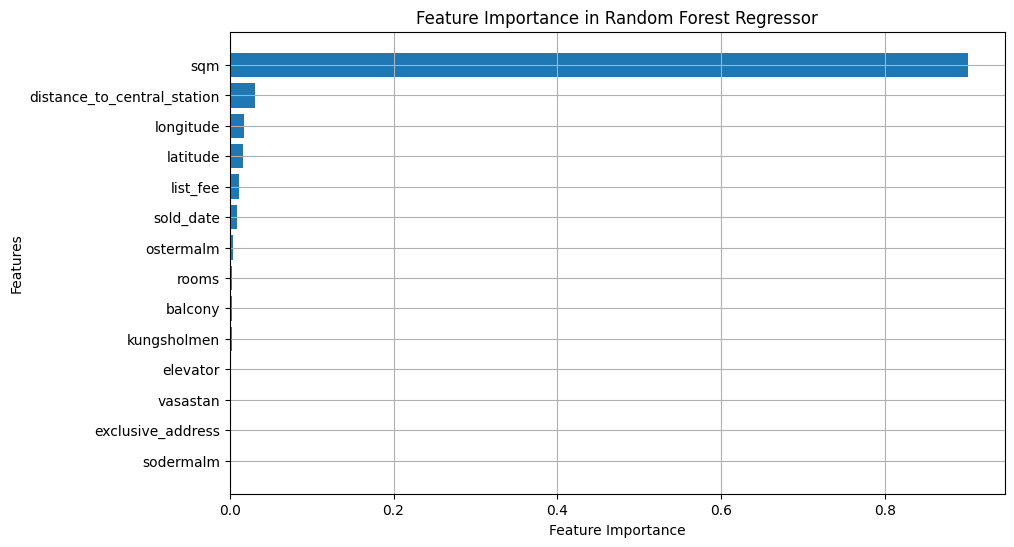

In [41]:
# Extract feature importance
feature_importances = rf.feature_importances_
feature_names = X_train.columns  

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Regressor")
plt.gca().invert_yaxis()  # Invert Y-axis to show the most important feature at the top
plt.grid()
plt.show()


In [42]:
y_pred = pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mae_pct = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("TRAINING DATA\n")
print("MSE: ", mse)
print("MAE: ", mae)
print("MAE pct: ", mae_pct)
print("R-squared: ", r2)

TRAINING DATA

MSE:  487121823484.13007
MAE:  495961.6891424619
MAE pct:  0.08395927669632844
R-squared:  0.9351927816102727


In [ ]:
X_test.columns

In [ ]:
np.set_printoptions(suppress=True)

df.iloc[2184].values

In [ ]:
# Fill the values in this dictionary with information about your own apartment to get predictions on its price!

my_apartment = pd.DataFrame({"list_fee": ,"sold_date": ,"sqm": ,"rooms": ,"elevator": ,"balcony": ,
                        "kungsholmen":, "ostermalm":, "sodermalm":, "vasastan":, "latitude":, 
                        "longitude":,"distance_to_central_station":, "exclusive_address":})
                        
                        
                        

In [ ]:
pipe.predict(my_apartment)